In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.stats import gamma
from matplotlib import rc
import numpy as np
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

res_mat = sio.loadmat('resSave.mat')

# global switch to save plots. Set to True to save new plots
g_save_fig = False

In [2]:
def extract_statistics(session_number):
    sizes = []
    mean_frs = []
    pass_durs = []
    spike_times = {}
    
    assert session_number in [4, 5, 6, 7, 8]
    
    for k in range(len(res_mat['resSave'][0, session_number]['fieldInfoC'])):
        if len(res_mat['resSave'][0, session_number]['fieldInfoC'][k]) == 0:
            continue
            
        for p in range(len(res_mat['resSave'][0, session_number]['fieldInfoC'][k])):

            size_array = res_mat['resSave'][0, session_number]['fieldInfoC'][k][p]['size']
            mean_array = res_mat['resSave'][0, session_number]['fieldInfoC'][k][p]['nSpike']
            pass_array = res_mat['resSave'][0, session_number]['fieldInfoC'][k][p]['passDur']
            try:
                is_nov = res_mat['resSave'][0, session_number]['fieldInfoC'][k][p]['isnov']
            except:
                is_nov = []
            # subep = res_mat['resSave'][0, session_number]['fieldInfoC'][k][p]['subep']
            # spike_times_array = res_mat['resSave'][0, i]['fieldInfoC'][k][p]['spikeTimes']

            assert len(size_array) == len(mean_array)
            if len(is_nov) > 0:
                assert len(size_array) == len(is_nov), size_array

            def extract_entries(arr, global_list, novel=[]):
                for i, entry in enumerate(arr):
                    if len(entry) == 0:
                        continue 

                    if len(entry) > 1:
                        for j, e_entry in enumerate(entry):
                            if len(novel) > 0:
                                if novel[i][j][0] == 1:
                                    global_list.append(e_entry[0][0])
                            else:
                                global_list.append(e_entry[0][0])
                    else:
                        if len(novel) > 0:
                            if novel[i][0] == 1:
                                global_list.append(entry[0][0])
                        else:
                            global_list.append(entry[0][0])

            starting_len = len(sizes)
            extract_entries(size_array, sizes, is_nov)
            extract_entries(mean_array, mean_frs, is_nov)
            extract_entries(pass_array, pass_durs, is_nov)
            ending_len = len(sizes)

            new_pfs = ending_len - starting_len
            print('{} new place fields detected'.format(new_pfs))

    def compress_list(raw_list):
        new = []
        for s in raw_list:
            if isinstance(s, np.ndarray):
                new.append(s[0])
            else:
                new.append(s)

        return np.array(new)

    new_sizes = compress_list(sizes)
    new_mean_frs = compress_list(mean_frs)
    new_pass = compress_list(pass_durs)
    
    return new_sizes, new_mean_frs, new_pass

In [3]:
def fit_dist(new_sizes, session, upper_bound=300, scale=3, floc=5):
    def clip(sizes, clip_size):
        actual_sizes = []
        for s in new_sizes:
            if s < clip_size:
                actual_sizes.append(s)

        return np.array(actual_sizes)

    figsize = 4 if floc == 0 else 2
    fig, ax = plt.subplots(figsize=(figsize,figsize))
    upper_bound = 300
    n_bins = int(upper_bound / 3)
    counts = ax.hist(clip(new_sizes, upper_bound), bins=n_bins, range=(0, upper_bound), density=True,
                     color='cadetblue', alpha=0.5)

    params = gamma.fit(clip(new_sizes, upper_bound), floc=floc)
    gamma_fitted = gamma.pdf(np.linspace(0, upper_bound, num=upper_bound), *params)

    ax.plot(gamma_fitted, color='black')
    ax.set_xlim((0, 200))
    ax.set_xlabel('Field size (m)', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.tick_params(direction='in')
    # ax.legend(frameon=False)
    ax.set_xticks([0, 100, 200, 300], ['0', '1', '2', '3'])
    ax.set_ylim((0, 0.035))
    ax.spines[['right', 'top']].set_visible(False)
    
    if g_save_fig:
        fig.savefig('field_size_density_session{}_floc{}'.format(session, floc), dpi=300, bbox_inches='tight')
    
    return params, gamma_fitted

0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
6 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
3 new place fields detected
2 new place fields detected
3 new place fields detected
8 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields d

0 new place fields detected
1 new place fields detected
2 new place fields detected
3 new place fields detected
3 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
2 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
3 new place fields detected
3 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
5 new place fields detected
2 new place fields d

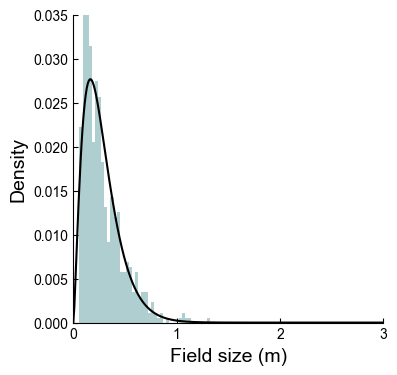

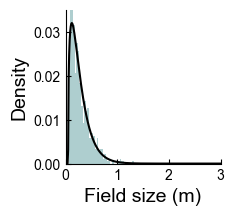

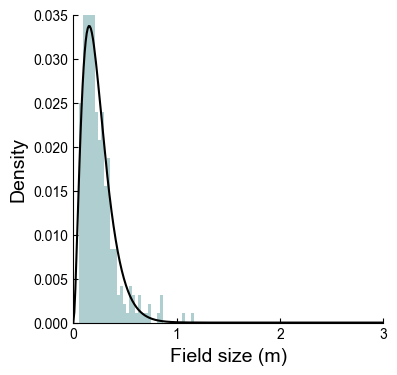

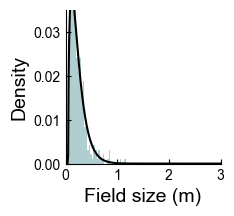

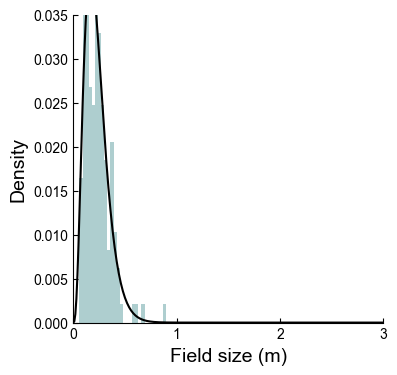

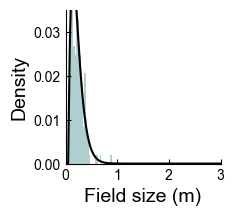

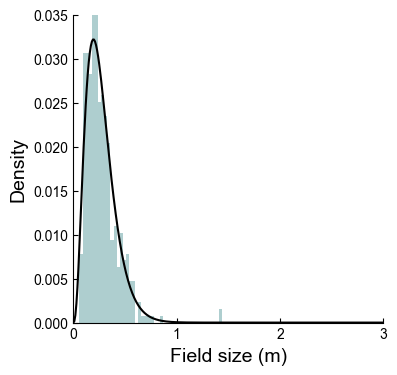

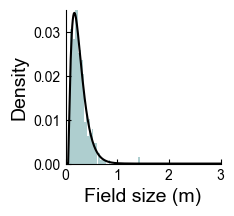

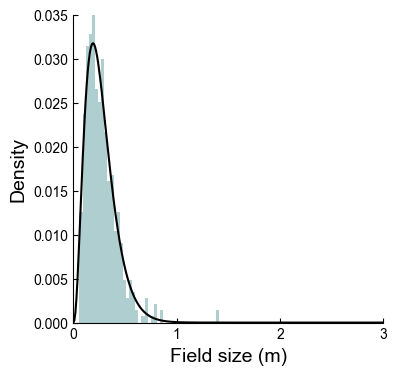

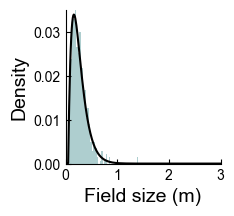

In [4]:
floc_shapes = np.zeros(5)
shapes = np.zeros(5)

floc_means = np.zeros(5)
means = np.zeros(5)
for i, sess in enumerate(range(4, 9)):
    new_sizes, new_mean_frs, new_pass = extract_statistics(sess)
    params, gamma_fitted = fit_dist(new_sizes, sess, floc=0)
    shapes[i] = params[0]
    means[i] = params[-1] * shapes[i]
    
    params, gamma_fitted = fit_dist(new_sizes, sess)
    floc_shapes[i] = params[0]
    floc_means[i] = params[-1] * floc_shapes[i]

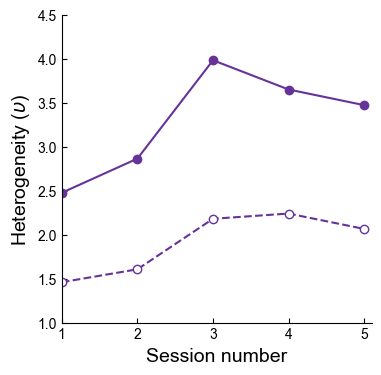

In [5]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(shapes, '-o', color='rebeccapurple')
ax.plot(floc_shapes, '--o', color='rebeccapurple', markerfacecolor='white')
ax.set_xticks(np.arange(len(shapes)), ['1', '2', '3', '4', '5'])
ax.set_xlabel('Session number', fontsize=14)
ax.set_ylim((1, 4.5))
ax.set_ylabel(r'Heterogeneity ($\upsilon$)', fontsize=14)
ax.tick_params(direction='in')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim((0,4.1))

if g_save_fig:
    fig.savefig('heterogeneity_over_sessions', dpi=300, bbox_inches='tight')

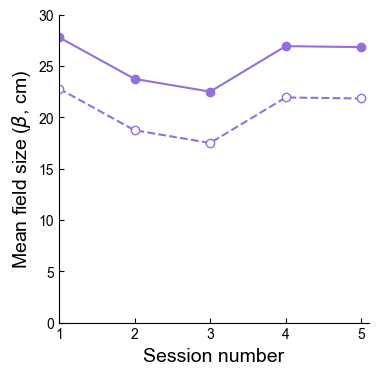

In [6]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(means, '-o', color='mediumpurple')
ax.plot(floc_means, '--o', color='mediumpurple', markerfacecolor='white')
ax.set_xticks(np.arange(len(means)), ['1', '2', '3', '4', '5'])
ax.set_xlabel('Session number', fontsize=14)
ax.set_ylim((0, 30))
ax.set_xlim((0, 4.1))
ax.set_ylabel(r'Mean field size ($\beta$, cm)', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction='in')

if g_save_fig:
    fig.savefig('mfs_over_sessions', dpi=300, bbox_inches='tight')

0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
6 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
3 new place fields detected
2 new place fields detected
3 new place fields detected
8 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields d

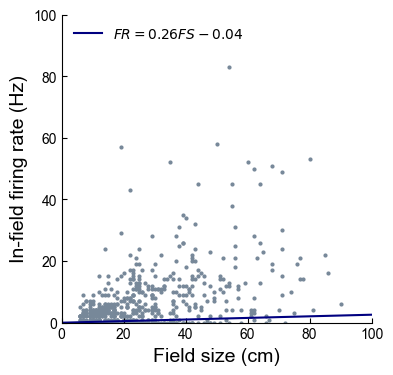

In [7]:
import scipy as sp

new_sizes, new_mean_frs, new_pass = extract_statistics(4)

# filter pf < 100 cm (sparse data for larger fields makes graphs harder to interpret)
sub_sizes = []
sub_mean_frs = []
for i in range(len(new_sizes)):
    if new_sizes[i] <= 100:
        sub_sizes.append(new_sizes[i])
        sub_mean_frs.append(new_mean_frs[i])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(sub_sizes, sub_mean_frs, color='lightslategrey', s=4)
res = sp.stats.linregress(sub_sizes, sub_mean_frs)
ax.plot(res.slope * np.linspace(0, 100, num=1000) + res.intercept, 
        color='navy',
        label='$FR = 0.26FS - 0.04$')
print(res)
print(res.rvalue ** 2)
ax.legend(frameon=False, loc='upper left')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylim((0, 100))
ax.set_xlim((0, 100))
ax.set_ylabel(r'In-field firing rate (Hz)', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction='in')

if g_save_fig:
    fig.savefig('field_size_v_fr_session4', dpi=300, bbox_inches='tight')

0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
6 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
0 new place fields detected
1 new place fields detected
3 new place fields detected
2 new place fields detected
3 new place fields detected
8 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
1 new place fields detected
1 new place fields detected
0 new place fields d

/Users/zachcohen/Dropbox/grad_school/lab/jan_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zachcohen/Dropbox/grad_school/lab/jan_env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/zachcohen/Dropbox/grad_school/lab/jan_env/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zachcohen/Dropbox/grad_school/lab/jan_env/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/zachcohen/Dropbox/grad_school/lab/jan_env/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.

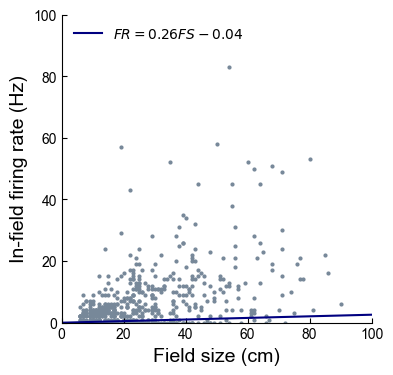

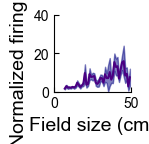

In [8]:
import numpy as np

new_sizes, new_mean_frs, new_pass = extract_statistics(4)
# inset cutoff
pf_cutoff = 50
bins = np.arange(0, pf_cutoff)
idxs = np.digitize(new_sizes, bins)
import scipy as sp

mean_spike_counts = np.zeros(pf_cutoff)
sem_spike_counts = np.zeros(pf_cutoff)
for i in range(pf_cutoff):
    mean_spike_counts[i] = np.mean(new_mean_frs[idxs == i])
    sem_spike_counts[i] = sp.stats.sem(new_mean_frs[idxs == i])

# filter pf < 100 cm (sparse data for larger fields makes graphs harder to interpret)
sub_sizes = []
sub_mean_frs = []
for i in range(len(new_sizes)):
    if new_sizes[i] <= 100:
        sub_sizes.append(new_sizes[i])
        sub_mean_frs.append(new_mean_frs[i])
    
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(new_sizes, new_mean_frs, color='lightslategrey', s=4)
res = sp.stats.linregress(sub_sizes, sub_mean_frs)
ax.plot(np.linspace(0, 100, num=1000) * res.slope + res.intercept, 
        color='navy',
        label='$FR = 0.26FS - 0.04$')
print(res)
print(res.rvalue ** 2)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('In-field firing rate (Hz)', fontsize=14)
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))
ax.legend(frameon=False, loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('field_size_v_fr_session4', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(1,1))
ax.plot(bins, mean_spike_counts, color='indigo')
ax.fill_between(bins, 
                mean_spike_counts + sem_spike_counts, 
                mean_spike_counts - sem_spike_counts, 
                color='navy',
                alpha=0.5)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('Normalized firing rate', fontsize=14)
ax.set_xlim((0, 50))
ax.set_ylim((0, 40))
ax.spines[['right', 'top']].set_visible(False)

if g_save_fig:
    fig.savefig('field_size_fr_mean_sem_sess4', dpi=300, bbox_inches='tight')

2 new place fields detected
0 new place fields detected
4 new place fields detected
6 new place fields detected
18 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
4 new place fields detected
8 new place fields detected
2 new place fields detected
1 new place fields detected
1 new place fields detected
4 new place fields detected
7 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
3 new place fields detected
4 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
4 new place fields detected
6 new place fields detected
0 new place fields 

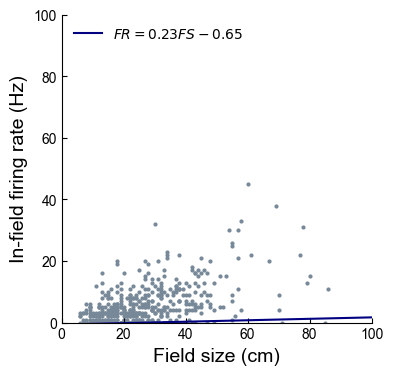

In [9]:
new_sizes, new_mean_frs, new_pass = extract_statistics(8)

sub_sizes = []
sub_mean_frs = []
for i in range(len(new_sizes)):
    if new_sizes[i] <= 100:
        sub_sizes.append(new_sizes[i])
        sub_mean_frs.append(new_mean_frs[i])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(sub_sizes, sub_mean_frs, color='lightslategrey', s=4)
res = sp.stats.linregress(sub_sizes, sub_mean_frs)
ax.plot(res.slope * np.linspace(0, 100, num=1000) + res.intercept, 
        color='navy',
        label='$FR = 0.23FS - 0.65$')
print(res)
print(res.rvalue ** 2)
ax.legend(frameon=False, loc='upper left')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylim((0, 100))
ax.set_xlim((0, 100))
ax.set_ylabel(r'In-field firing rate (Hz)', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(direction='in')

if g_save_fig:
    fig.savefig('field_size_v_fr_session8', dpi=300, bbox_inches='tight')

2 new place fields detected
0 new place fields detected
4 new place fields detected
6 new place fields detected
18 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
4 new place fields detected
8 new place fields detected
2 new place fields detected
1 new place fields detected
1 new place fields detected
4 new place fields detected
7 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
3 new place fields detected
4 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
4 new place fields detected
6 new place fields detected
0 new place fields 

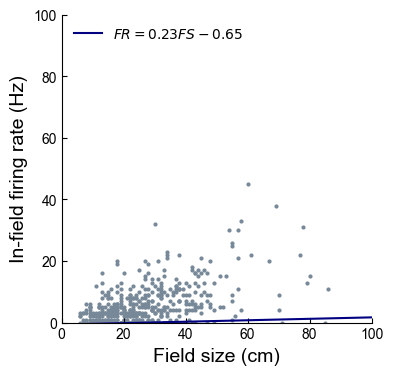

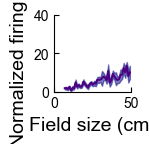

In [10]:
new_sizes, new_mean_frs, new_pass = extract_statistics(8)
# inset cutoff
pf_cutoff = 50
bins = np.arange(0, pf_cutoff)
idxs = np.digitize(new_sizes, bins)
import scipy as sp

mean_spike_counts = np.zeros(pf_cutoff)
sem_spike_counts = np.zeros(pf_cutoff)
for i in range(pf_cutoff):
    mean_spike_counts[i] = np.mean(new_mean_frs[idxs == i])
    sem_spike_counts[i] = sp.stats.sem(new_mean_frs[idxs == i])
    
sub_sizes = []
sub_mean_frs = []
for i in range(len(new_sizes)):
    if new_sizes[i] <= 100:
        sub_sizes.append(new_sizes[i])
        sub_mean_frs.append(new_mean_frs[i])
    
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(new_sizes, new_mean_frs, color='lightslategrey', s=4)
res = sp.stats.linregress(sub_sizes, sub_mean_frs)
ax.plot(np.linspace(0, 100, num=1000) * res.slope + res.intercept, 
        color='navy',
        label='$FR = 0.23FS - 0.65$')
print(res)
print(res.rvalue ** 2)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('In-field firing rate (Hz)', fontsize=14)
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))
ax.legend(frameon=False, loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('field_size_v_fr_session8', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(1,1))
ax.plot(bins, mean_spike_counts, color='indigo')
ax.fill_between(bins, 
                mean_spike_counts + sem_spike_counts, 
                mean_spike_counts - sem_spike_counts, 
                color='navy',
                alpha=0.5)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('Normalized firing rate', fontsize=14)
ax.set_xlim((0, 50))
ax.set_ylim((0, 40))
ax.spines[['right', 'top']].set_visible(False)

if g_save_fig:
    fig.savefig('field_size_fr_mean_sem_sess8', dpi=300, bbox_inches='tight')

---

### Normalizing peak firing rate by pass duration - not used in paper

2 new place fields detected
0 new place fields detected
4 new place fields detected
6 new place fields detected
18 new place fields detected
1 new place fields detected
0 new place fields detected
0 new place fields detected
4 new place fields detected
8 new place fields detected
2 new place fields detected
1 new place fields detected
1 new place fields detected
4 new place fields detected
7 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
2 new place fields detected
0 new place fields detected
0 new place fields detected
2 new place fields detected
3 new place fields detected
4 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
0 new place fields detected
3 new place fields detected
1 new place fields detected
4 new place fields detected
6 new place fields detected
0 new place fields 

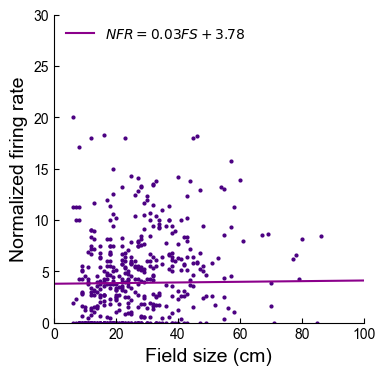

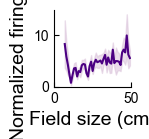

In [11]:
new_sizes, new_mean_frs, new_pass = extract_statistics(8)
# inset cutoff
pf_cutoff = 50
bins = np.arange(0, pf_cutoff)
idxs = np.digitize(new_sizes, bins)
import scipy as sp

normalized_frs = np.divide(new_mean_frs, new_pass)

mean_spike_counts = np.zeros(pf_cutoff)
sem_spike_counts = np.zeros(pf_cutoff)
for i in range(pf_cutoff):
    mean_spike_counts[i] = np.mean(normalized_frs[idxs == i])
    sem_spike_counts[i] = sp.stats.sem(normalized_frs[idxs == i])
    
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(new_sizes, normalized_frs, color='indigo', s=4)
res = sp.stats.linregress(new_sizes, normalized_frs)
ax.plot(np.linspace(0, 100, num=1000) * res.slope + res.intercept, 
        color='darkmagenta',
        label='$NFR = 0.03FS + 3.78$')
print(res)
print(res.rvalue ** 2)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('Normalized firing rate', fontsize=14)
ax.set_xlim((0, 100))
ax.set_ylim((0, 30))
ax.legend(frameon=False, loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('normalized_fr_sess8', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(1,1))
ax.plot(bins, mean_spike_counts, color='indigo')
ax.fill_between(bins, 
                mean_spike_counts + sem_spike_counts, 
                mean_spike_counts - sem_spike_counts, 
                color='thistle',
                alpha=0.5)
ax.tick_params(direction='in')
ax.set_xlabel('Field size (cm)', fontsize=14)
ax.set_ylabel('Normalized firing rate', fontsize=14)
ax.set_xlim((0, 50))
ax.set_ylim((0, 15))
ax.spines[['right', 'top']].set_visible(False)

if g_save_fig:
    fig.savefig('normalized_fr_mean_sem_sess8', dpi=300, bbox_inches='tight')